# How are in-demand skills trending for Data Analysts

**Methodology**

1. Aggregate skill counts monthly
2. RE-analyze based on percentage of total jobs
3. plot the monthly skill demand 

In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast
from datasets import load_dataset

#loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_UK = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

In [4]:
df_DA_UK['job_posted_month_no'] = df_DA_UK['job_posted_date'].dt.month

In [5]:
df_DA_UK_exploded = df_DA_UK.explode('job_skills')

In [31]:
df_DA_UK_pivot = df_DA_UK_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_UK_pivot.loc['Total'] = df_DA_UK_pivot.sum()

df_DA_UK_pivot = df_DA_UK_pivot[df_DA_UK_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_UK_pivot = df_DA_UK_pivot.drop('Total')

df_DA_UK_pivot

job_skills,sql,excel,power bi,python,tableau,r,sas,azure,go,powerpoint,...,selenium,flutter,fortran,redis,golang,ionic,kotlin,laravel,node,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,607,581,371,266,204,141,126,73,54,78,...,0,1,0,0,0,0,0,0,1,0
2,450,479,287,179,171,91,92,65,46,45,...,0,0,0,0,0,0,0,0,0,0
3,301,299,174,120,117,67,52,38,42,43,...,0,0,0,0,0,0,0,0,0,0
4,230,227,160,90,75,47,38,32,27,39,...,0,0,0,1,0,1,0,0,0,0
5,258,249,161,96,76,53,40,36,29,27,...,0,0,0,0,0,0,0,0,0,0
6,282,297,181,118,95,52,36,36,37,34,...,0,0,0,0,0,0,0,0,0,0
7,398,394,297,202,106,97,78,111,45,84,...,0,0,0,0,0,0,0,0,0,0
8,260,262,171,109,84,51,36,42,39,28,...,0,0,1,0,0,0,0,0,0,0
9,498,451,318,255,206,144,82,70,61,48,...,0,0,0,0,0,0,1,1,0,0


In [35]:
DA_totals = df_DA_UK.groupby('job_posted_month_no').size()

In [57]:
df_DA_UK_percent = df_DA_UK_pivot.div(DA_totals/100, axis=0)



#changes month number to month name
df_DA_UK_percent = df_DA_UK_percent.reset_index()
df_DA_UK_percent['job_posted_month'] = df_DA_UK_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))

df_DA_UK_percent = df_DA_UK_percent.set_index('job_posted_month')
df_DA_UK_percent = df_DA_UK_percent.drop(columns='job_posted_month_no')

df_DA_UK_percent

job_skills,sql,excel,power bi,python,tableau,r,sas,azure,go,powerpoint,...,selenium,flutter,fortran,redis,golang,ionic,kotlin,laravel,node,next.js
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,41.376960,39.604635,25.289707,18.132243,13.905930,9.611452,8.588957,4.976142,3.680982,5.316973,...,0.000000,0.068166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068166,0.000000
Feb,42.816365,45.575642,27.307326,17.031399,16.270219,8.658421,8.753568,6.184586,4.376784,4.281637,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,42.275281,41.994382,24.438202,16.853933,16.432584,9.410112,7.303371,5.337079,5.898876,6.039326,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,40.998217,40.463458,28.520499,16.042781,13.368984,8.377897,6.773619,5.704100,4.812834,6.951872,...,0.000000,0.000000,0.000000,0.178253,0.000000,0.178253,0.000000,0.000000,0.000000,0.000000
May,42.019544,40.553746,26.221498,15.635179,12.377850,8.631922,6.514658,5.863192,4.723127,4.397394,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,38.315217,40.353261,24.592391,16.032609,12.907609,7.065217,4.891304,4.891304,5.027174,4.619565,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,44.618834,44.170404,33.295964,22.645740,11.883408,10.874439,8.744395,12.443946,5.044843,9.417040,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,42.622951,42.950820,28.032787,17.868852,13.770492,8.360656,5.901639,6.885246,6.393443,4.590164,...,0.000000,0.000000,0.163934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,44.784173,40.557554,28.597122,22.931655,18.525180,12.949640,7.374101,6.294964,5.485612,4.316547,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089928,0.089928,0.000000,0.000000


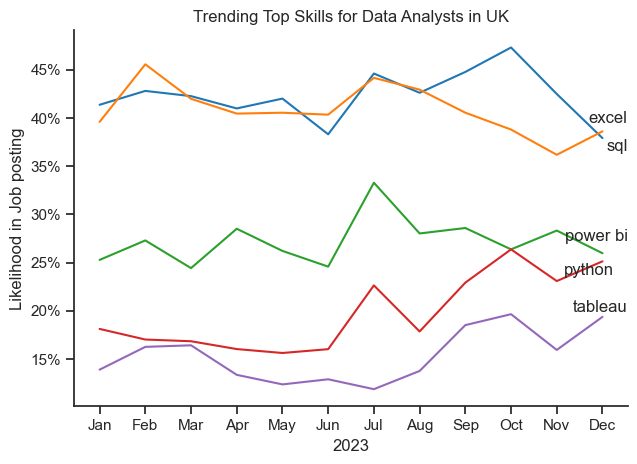

In [129]:
# Using only 5 columns and all the rows

df_plot = df_DA_UK_percent.iloc[:, :5]

# Using df_plot to plot a line graph
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in UK')
plt.ylabel('Likelihood in Job posting')
plt.xlabel('2023')
plt.legend().remove()
plt.tight_layout()

#formatting the yaxis
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))


# To indicate each skills on the trend
#for i in range(5):
    #plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])

from adjustText import adjust_text
texts = []
for i in range(5):
    texts.append(plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i]))

adjust_text(texts, rotation=45)
    
plt.show()